In [7]:
# Wortzählung

import json
from collections import Counter
import re

# Liste der Parteien
parties = ['SPD', 'FDP', 'CDU/CSU', 'DIE LINKE', 'BÜNDNIS 90/DIE GRÜNEN', 'AfD']

# Liste der Begriffe zum Oberthema Migration
target_words = [
    'migranten', 'flüchtlinge', 'ausländer', 'asylbewerber', 'asylanten', 'einwanderer', 'zuwanderer', 'neuankömmlinge',
    'geflüchtete', 'gastarbeiter', 'asylbetrüger', 'wirtschaftsflüchtlinge', 'invasoren', 'sozialschmarotzer', 'migration',
    'flüchtlingswelle', 'remigration', 'integration', 'flüchtlingskrise', 'willkommenskultur', 'rückführung', 'abschiebung',
    'überfremdung', 'asylmissbrauch', 'fachkräftezuwanderung', 'chancenvielfalt', 'einwanderungsquote', 'bleiberecht',
    'ankunftsgesellschaft', 'migrationshintergrund'
]

# alle Wörter zählen für jede Partei
word_counts_per_party = {}

# Funktion zur Bereinigung und Tokenisierung des Textes (deutsche Sprache)
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-zäöüß]', ' ', text)
    words = text.split()
    return words

# JSONL-Datei zeilenweise verarbeiten
with open('speeches_19.jsonl', 'r', encoding='utf-8') as file: #hier jeweilige Datei (19 oder 20) einfügen
    for line in file:
        speech = json.loads(line.strip())  # Jede Zeile einzeln als JSON parsen
        party = speech['party']

        if party in parties:  # Nur für die angegebenen Parteien analysieren
            text = speech['text']
            words = clean_and_tokenize(text)

            if party not in word_counts_per_party:
                word_counts_per_party[party] = Counter()

            # Nur die angegebenen Begriffe zählen
            filtered_words = [word for word in words if word in target_words]
            word_counts_per_party[party].update(filtered_words)

# Ergebnis anzeigen
for party, word_count in word_counts_per_party.items():
    print(f"Wortzählungen für {party}:")
    print(word_count.most_common(30))

Wortzählungen für FDP:
[('migration', 142), ('flüchtlinge', 96), ('integration', 86), ('migranten', 29), ('abschiebung', 28), ('ausländer', 27), ('migrationshintergrund', 17), ('einwanderer', 14), ('asylbewerber', 14), ('flüchtlingskrise', 14), ('zuwanderer', 11), ('rückführung', 11), ('geflüchtete', 8), ('bleiberecht', 7), ('flüchtlingswelle', 6), ('willkommenskultur', 4), ('fachkräftezuwanderung', 4), ('gastarbeiter', 2), ('invasoren', 1)]
Wortzählungen für SPD:
[('migration', 232), ('flüchtlinge', 206), ('integration', 157), ('geflüchtete', 68), ('migranten', 68), ('ausländer', 44), ('migrationshintergrund', 40), ('abschiebung', 28), ('asylbewerber', 17), ('einwanderer', 13), ('gastarbeiter', 13), ('rückführung', 12), ('zuwanderer', 11), ('flüchtlingskrise', 8), ('fachkräftezuwanderung', 5), ('bleiberecht', 3), ('wirtschaftsflüchtlinge', 3), ('willkommenskultur', 3), ('asylanten', 1)]
Wortzählungen für AfD:
[('migranten', 341), ('migration', 243), ('flüchtlinge', 208), ('integration

In [8]:
# Forschungshypothese: jede Partei hat einen geläufigen Zuschreibungsbegriff für Migranten

# Liste der Parteien
parties = ['SPD', 'FDP', 'CDU/CSU', 'DIE LINKE', 'BÜNDNIS 90/DIE GRÜNEN', 'AfD']

# Liste der zu zählenden Wörter: nur Personenbeschreibungen
target_words = [
    'migranten', 'flüchtlinge', 'ausländer', 'asylbewerber', 'asylanten', 'einwanderer', 'zuwanderer', 'neuankömmlinge',
    'geflüchtete', 'gastarbeiter', 'asylbetrüger', 'wirtschaftsflüchtlinge', 'invasoren', 'sozialschmarotzer'
]

# Wörter zählen für jede Partei
word_counts_per_party = {}

# Funktion zur Bereinigung und Tokenisierung des Textes (deutsch)
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-zäöüß]', ' ', text)
    words = text.split()
    return words

# JSONL-Datei zeilenweise verarbeiten
with open('speeches_20.jsonl', 'r', encoding='utf-8') as file: #hier jeweilige Datei einfügen
    for line in file:
        speech = json.loads(line.strip())  # Jede Zeile einzeln als JSON parsen
        party = speech['party']

        if party in parties:  # Nur für die angegebenen Parteien analysieren
            text = speech['text']
            words = clean_and_tokenize(text)

            if party not in word_counts_per_party:
                word_counts_per_party[party] = Counter()

            # Nur die Zielwörter zählen
            filtered_words = [word for word in words if word in target_words]
            word_counts_per_party[party].update(filtered_words)

# Ergebnis anzeigen
for party, word_count in word_counts_per_party.items():
    print(f"Meistgenutzter Begriff {party}:")
    print(word_count.most_common(1)) # der am meisten genutzte Personenzuschreibungsbegriff

Meistgenutzter Begriff SPD:
[('geflüchtete', 180)]
Meistgenutzter Begriff CDU/CSU:
[('flüchtlinge', 163)]
Meistgenutzter Begriff BÜNDNIS 90/DIE GRÜNEN:
[('geflüchtete', 174)]
Meistgenutzter Begriff FDP:
[('flüchtlinge', 60)]
Meistgenutzter Begriff AfD:
[('migranten', 206)]
Meistgenutzter Begriff DIE LINKE:
[('geflüchtete', 93)]


Partei: SPD, Gesamtanzahl der Nennungen: 1161
Partei: FDP, Gesamtanzahl der Nennungen: 578
Partei: CDU/CSU, Gesamtanzahl der Nennungen: 1079
Partei: DIE LINKE, Gesamtanzahl der Nennungen: 224
Partei: BÜNDNIS 90/DIE GRÜNEN, Gesamtanzahl der Nennungen: 551
Partei: AfD, Gesamtanzahl der Nennungen: 1089


/var/folders/qt/pl760j3527q8n5rw4xp0fxv00000gn/T/ipykernel_4361/927268020.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Partei', y='Anzahl', data=df, palette=parties)


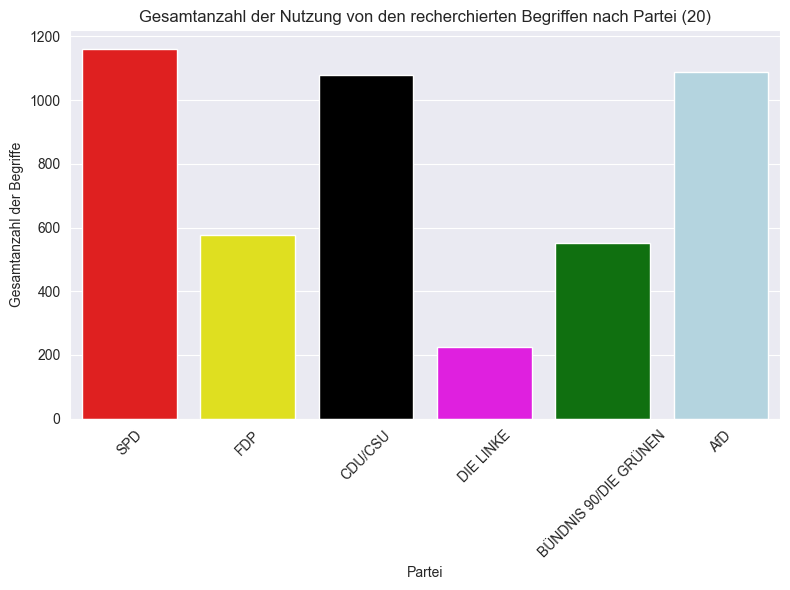

In [9]:
# Forschungshypothese: Die AfD redet insgesamt mehr über Migration als andere Parteien im Bundestag

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Liste der Parteien und deren Farben für Barplot
parties = {
    'SPD': 'red',
    'FDP': 'yellow',
    'CDU/CSU': 'black',
    'DIE LINKE': 'magenta',
    'BÜNDNIS 90/DIE GRÜNEN': 'green',
    'AfD': 'lightblue'
}

# Liste der zu zählenden Wörter
target_words = [
    'migranten', 'flüchtlinge', 'ausländer', 'asylbewerber', 'asylanten', 'einwanderer', 'zuwanderer', 'neuankömmlinge',
    'geflüchtete', 'gastarbeiter', 'asylbetrüger', 'wirtschaftsflüchtlinge', 'invasoren', 'sozialschmarotzer', 'migration',
    'flüchtlingswelle', 'remigration', 'integration', 'flüchtlingskrise', 'willkommenskultur', 'rückführung', 'abschiebung',
    'überfremdung', 'asylmissbrauch', 'fachkräftezuwanderung', 'chancenvielfalt', 'einwanderungsquote', 'bleiberecht',
    'ankunftsgesellschaft', 'migrationshintergrund'
]

# Wörter zählen für jede Partei
word_counts_per_party = {party: 0 for party in parties}

# Funktion zur Bereinigung und Tokenisierung des Textes
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-zäöüß]', ' ', text)
    words = text.split()
    return words

# JSONL-Datei zeilenweise verarbeiten
with open('speeches_20.jsonl', 'r', encoding='utf-8') as file: #hier jeweilige Datei (19. oder 20. LP) einfügen
    for line in file:
        speech = json.loads(line.strip())  # Jede Zeile einzeln als JSON parsen
        party = speech['party']

        if party in parties:  # Nur für die angegebenen Parteien analysieren
            text = speech['text']
            words = clean_and_tokenize(text)

            # Zähle nur die Zielwörter
            filtered_words = [word for word in words if word in target_words]
            word_counts_per_party[party] += len(filtered_words)

# Ausgabe der Gesamtanzahl der insgesamten Nennungen pro Partei
for party, count in word_counts_per_party.items():
    print(f"Partei: {party}, Gesamtanzahl der Nennungen: {count}")
    
# Daten für den Export in ein DataFrame umwandeln
all_data = []

for party, count in word_counts_per_party.items():
    all_data.append([party, count])

# DataFrame erstellen
df = pd.DataFrame(all_data, columns=['Partei', 'Anzahl'])

# Balkendiagramm erstellen
plt.figure(figsize=(8, 6))
sns.barplot(x='Partei', y='Anzahl', data=df, palette=parties)
    
plt.xticks(rotation=45)  # Drehung der X-Achsen-Beschriftung (wichtig wenn Parteiname sehr lang)
plt.title('Gesamtanzahl der Nutzung von den recherchierten Begriffen nach Partei (20)') #hier bei der Beschriftung die Wahlperiode anpassen
plt.xlabel('Partei')
plt.ylabel('Gesamtanzahl der Begriffe')

# Barplot anzeigen
plt.tight_layout()
plt.show()

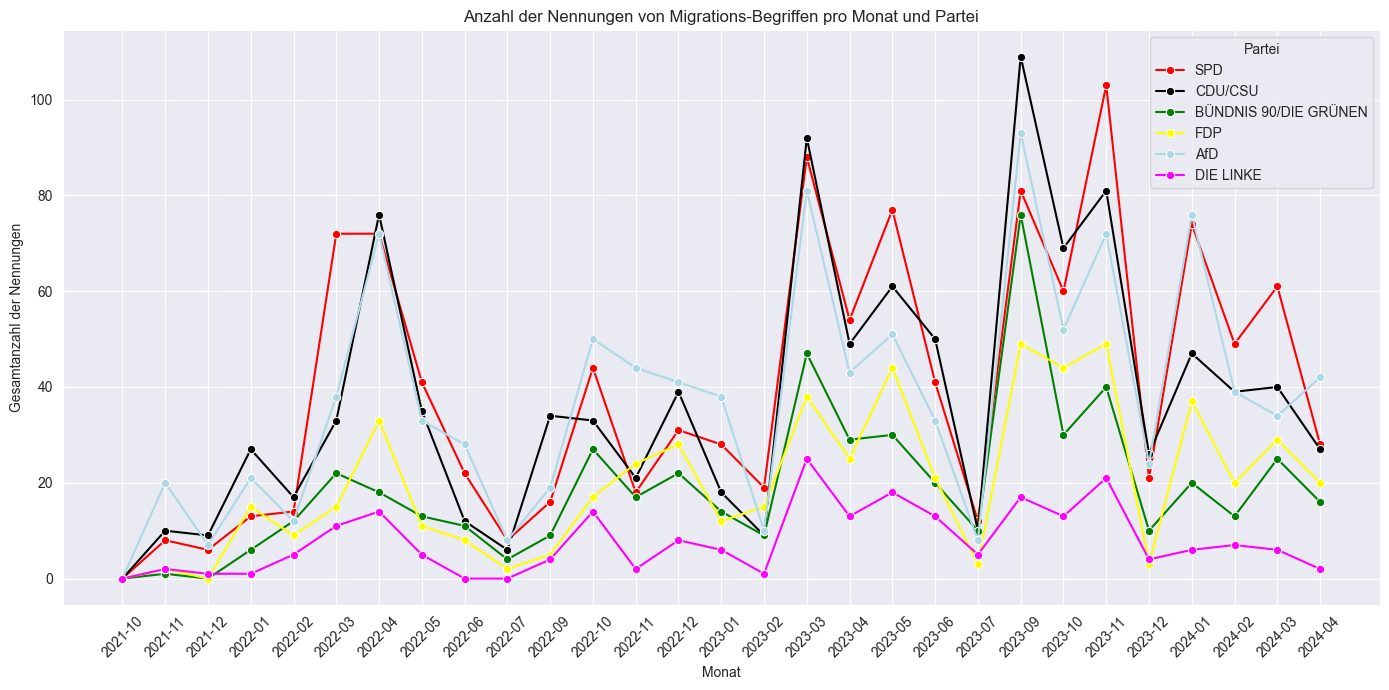

In [82]:
# zeitliche Komponente

import re
from collections import defaultdict

# Liste der zu zählenden Wörter
target_words = [
    'migranten', 'flüchtlinge', 'ausländer', 'asylbewerber', 'asylanten', 'einwanderer', 'zuwanderer', 'neuankömmlinge',
    'geflüchtete', 'gastarbeiter', 'asylbetrüger', 'wirtschaftsflüchtlinge', 'invasoren', 'sozialschmarotzer', 'migration',
    'flüchtlingswelle', 'remigration', 'integration', 'flüchtlingskrise', 'willkommenskultur', 'rückführung', 'abschiebung',
    'überfremdung', 'asylmissbrauch', 'fachkräftezuwanderung', 'chancenvielfalt', 'einwanderungsquote', 'bleiberecht',
    'ankunftsgesellschaft', 'migrationshintergrund'
]

# Liste der relevanten Parteien und ihre Farben
party_colors = {
    'SPD': 'red',
    'FDP': 'yellow',
    'CDU/CSU': 'black',
    'DIE LINKE': 'magenta',
    'BÜNDNIS 90/DIE GRÜNEN': 'green',
    'AfD': 'lightblue'
}

valid_parties = list(party_colors.keys())

# Funktion zur Bereinigung und Tokenisierung des Textes
def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'[^a-zäöüß]', ' ', text)
    words = text.split()
    return words

# DataFrame für die monatliche Zählung erstellen
monthly_counts = defaultdict(lambda: defaultdict(int))

# JSONL-Datei zeilenweise verarbeiten
with open('speeches_20.jsonl', 'r', encoding='utf-8') as file:
    for line in file:
        speech = json.loads(line.strip())  # Jede Zeile einzeln als JSON parsen
        date = speech['date'] 
        party = speech['party']
        text = speech['text']

        if party in valid_parties:  # Nur die relevanten Parteien berücksichtigen
            # Datum in Jahr und Monat umwandeln 
            year_month = date[:7]  # 'YYYY-MM'

            words = clean_and_tokenize(text)

            # Zähle nur die angegebenen Begriffe
            filtered_words = [word for word in words if word in target_words]
            monthly_counts[year_month][party] += len(filtered_words)

# Daten für den DataFrame umwandeln
data = []
for year_month, counts in monthly_counts.items():
    for party, count in counts.items():
        data.append([year_month, party, count])

# DataFrame erstellen
df = pd.DataFrame(data, columns=['Monat', 'Partei', 'Anzahl'])

# Diagramm erstellen
plt.figure(figsize=(14, 7))
sns.lineplot(x='Monat', y='Anzahl', hue='Partei', data=df, marker='o', linestyle='-', palette=party_colors)

plt.xticks(rotation=45)  # Drehung der X-Achsen-Beschriftung für bessere Lesbarkeit
plt.title('Anzahl der Nennungen von Migrations-Begriffen pro Monat und Partei')
plt.xlabel('Monat')
plt.ylabel('Gesamtanzahl der Nennungen')

# Zeige das Diagramm
plt.tight_layout()
plt.show()

In [10]:
# Sozialschmarotzer? Qualitative Nachforschung

# Begriff, nach dem gesucht wird
search_term = 'sozialschmarotzer'

# Liste für Reden, die den Begriff enthalten
relevant_speeches = []

# JSONL-Datei zeilenweise verarbeiten
with open('speeches_19.jsonl', 'r', encoding='utf-8') as file:
    for line in file:
        speech = json.loads(line.strip())  # Jede Zeile einzeln als JSON parsen
        text = speech['text']

        # Überprüfen, ob der Begriff im Text enthalten ist
        if search_term in text.lower():
            relevant_speeches.append(speech)

# Anzeigen der relevanten Reden
for speech in relevant_speeches:
    print(f"Partei: {speech['party']}")
    print(f"Datum: {speech['date']}")
    #print(f"Rede-ID: {speech.get('id')}")
    print(f"Redner*in: {speech.get('name')}")
    print("Text Ausschnitt:")
    print(speech['text'])
    print("-" * 80)

Partei: DIE LINKE
Datum: 2018-11-29
Redner*in: Achim Kessler
Text Ausschnitt:
Herr Präsident! Sehr geehrte Damen und Herren! In der letzten Woche in der Debatte über den Bundeshaushalt war Gelegenheit, umfassend über das zu reden, was wichtig in der Gesundheitspolitik ist. Die AfD hielt es aber offenbar für falsch, über hohe Beiträge für Geringverdiener, über den Pflegenotstand oder über den Ärztemangel auf dem Land zu reden. All das sind Themen, die für die Menschen in Deutschland wichtig sind. Nein, sie nutzte ihre Redezeit, um gegen den Migrationspakt, gegen HIV-infizierte Geflüchtete zu hetzen und Zwangstests zu fordern. Ausgerechnet diese Partei, deren Ziel es auch hier im Bundestag ständig ist, die Bevölkerung zu spalten, ganze Gruppen von jeder Teilhabe auszuschließen, und die gegen Arme hetzt, sie als Faulenzer, Drückeberger und Sozialschmarotzer beschimpft, hat nun angeblich Interesse an der Teilhabe sehbehinderter Menschen. Das ist leicht zu durchschauen. Denn die Forderung n